### 6.1 Reading and Writing Data in Text Format（读写文本格式的数据）

In [1]:
conda install posix #安装posix可以在windows中使用!cat等unix命令


Note: you may need to restart the kernel to use updated packages.



CondaValueError: invalid package specification: #??posix???windows???cat?unix??



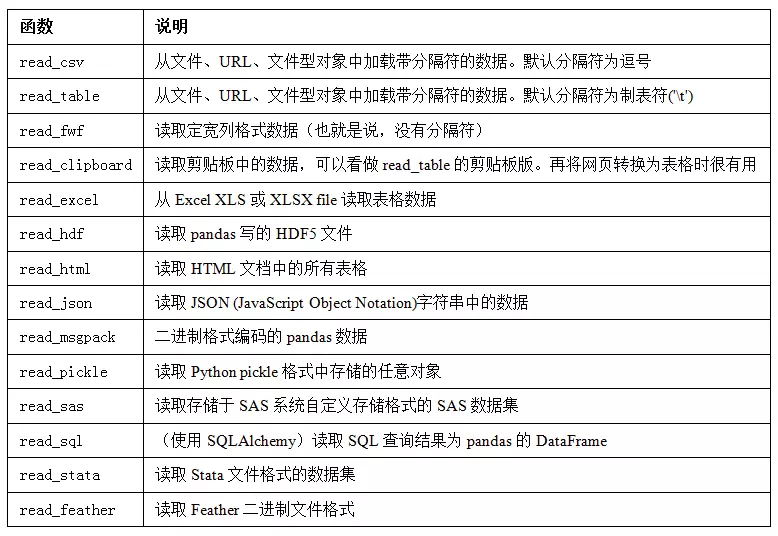

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [3]:
df = pd.read_csv('Course_material/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# 没有heading，pandas将分配默认列名
pd.read_csv('Course_material/examples/ex1.csv', header = None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [5]:
# 自定义列名
pd.read_csv('Course_material/examples/ex1.csv', 
            names = ['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [6]:
# pd.read_csv('Course_material/examples/ex1.csv', header = None)
parsed = pd.read_csv('Course_material/examples/csv_mindex.csv',
                    index_col = ['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [7]:
list(open('Course_material/examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [8]:
# 正则表达式表达为：s+；
# 由于列名比数据行的数量少，read_table()推断第一列应该是DataFrame的索引
result = pd.read_table('Course_material/examples/ex3.txt', sep = '\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [9]:
file = pd.read_csv('Course_material/examples/ex4.csv')
file

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
# skiprow去除特定行
pd.read_csv('Course_material/examples/ex4.csv', skiprows = [0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
result = pd.read_csv('Course_material/examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [12]:
pd.isnull(result) #返回布尔数组标记Na以及NaN的位置

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [13]:
result = pd.read_csv('Course_material/examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


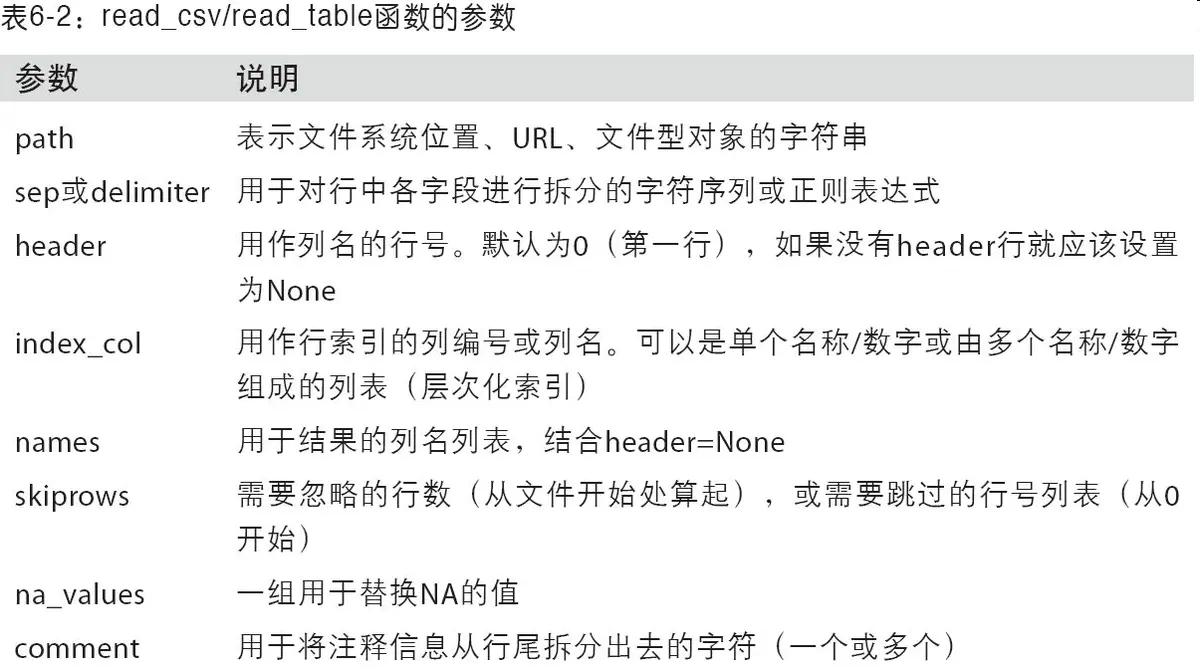

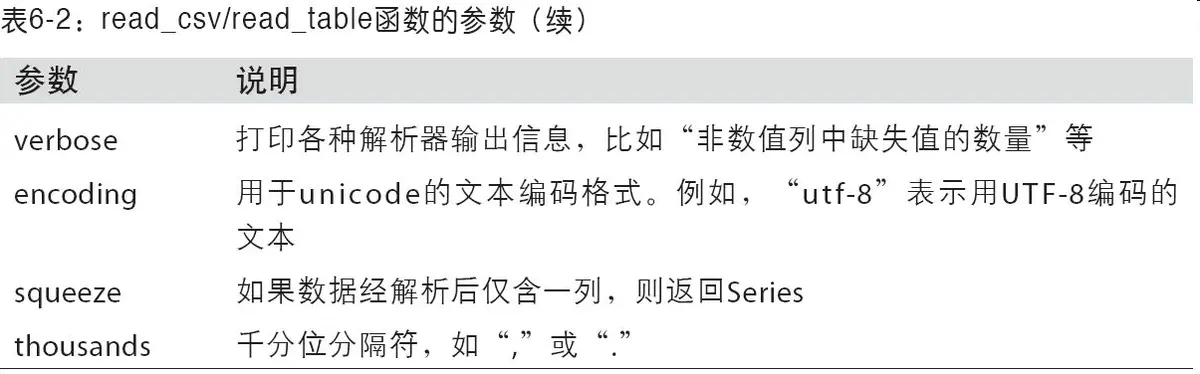

#### Reading Text Files in Pieces（逐块读取文本文件）

In [14]:
pd.options.display.max_rows = 10 #显示调整紧凑

In [15]:
result = pd.read_csv('Course_material/examples/ex6.csv')

In [16]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [17]:
result = pd.read_csv('Course_material/examples/ex6.csv', nrows = 5)# 读取有限行
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [18]:
# 根据chunksize对文件进行逐块迭代
chunker = pd.read_csv("Course_Material/examples/ex6.csv", chunksize=1000)

chunker

In [19]:
chunker = pd.read_csv('Course_Material/examples/ex6.csv', chunksize = 1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
tot = tot.sort_values(ascending = False)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

#### Writing Data to Text Format（将数据写出到文本格式）

In [21]:
data = pd.read_csv('Course_Material/examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [22]:
# 利用DataFrame的to_csv方法，我们可以将数据写到一个以逗号分隔的文件中
data.to_csv('Course_Material/examples/out.csv')

In [23]:
import sys
# 写出到sys.stdout，所以仅仅是打印出文本结果
data.to_csv(sys.stdout, sep = '|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [24]:
data.to_csv(sys.stdout, na_rep = 'NULL') # 缺失值在输出结果表示为别的标记值

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [25]:
data.to_csv(sys.stdout, index = False, header = False) # 禁用表情

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [26]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c']) # 只列出部分列

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [27]:
dates = pd.date_range('1/1/2000', periods = 7)
ts = pd.Series(np.arange(7), index = dates)
ts.to_csv('Course_Material/examples/tseries.csv')
!cat Course_Material/examples/tseries.csv

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


#### Working with Delimited Formats（处理分隔符格式）

In [39]:
import csv
# 使用Python内置的csv模块，将任意已打开的文件或文件型的对象传给csv.reader
f = open('Course_material/examples/ex7.csv')
reader = csv.reader(f)

In [29]:
for line in reader:# 这个reader进行迭代将会为每行产生一个元组（并移除了所有的引号）
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [37]:
with open('Course_Material/examples/ex7.csv') as f:
    lines = list(csv.reader(f)) # 读取文件到一个多行的列表中

In [31]:
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [32]:
header, values = lines[0], lines[1:]

In [33]:
tuple(zip(*values)) # zip(*values)：将行转置为列

(('1', '1'), ('2', '2'), ('3', '3'))

In [34]:
data_dict = {h: v for h, v in zip(header, zip(*values))}# 生成dict
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

定义csv.Dialect的一个子类即可定义出新格式（如专门的分隔符、字符串引用约定、行结束符等）

In [35]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ','
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f, dialect = my_dialect)

TypeError: argument 1 must be an iterator

In [40]:
reader = csv.reader(f, delimiter='|')

In [41]:
for line in reader:
    print(line)

['a,"b","c"']
['1,"2","3"']
['1,"2","3"']


In [42]:
with open('Course_material/mydata.csv', 'w') as f: # 打开可写的文件对象
    writer = csv.writer(f)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))


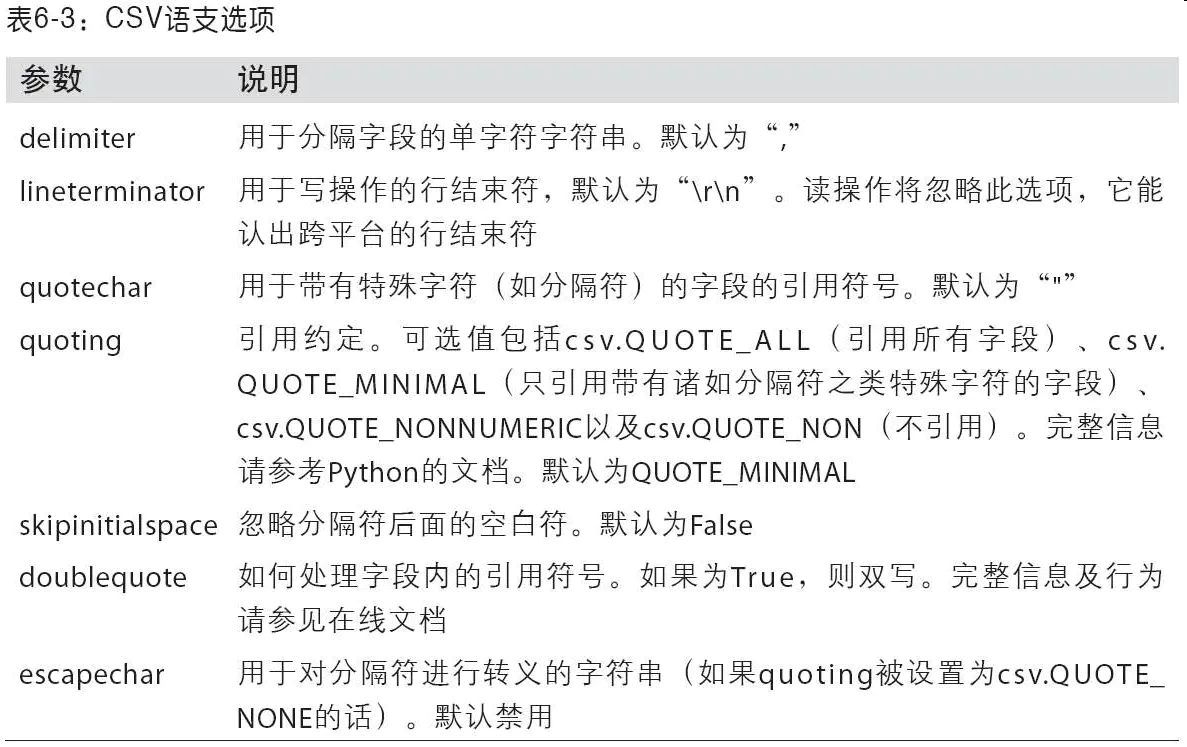

#### JSON Data（JSON 数据）

In [60]:
# JSON代码
obj = """ 
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [61]:
import json

In [65]:
result = json.loads(obj) # 通过json.loads即可将JSON字符串转换成Python形式(dict)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [66]:
asjson = json.dumps(result) # 将Python对象转换成JSON格式

In [67]:
type(asjson)

str

In [68]:
siblings = pd.DataFrame(result['siblings'], columns = ['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [69]:
!cat Course_material/examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [70]:
data = pd.read_json('Course_material/examples/example.json')

In [71]:
data # pandas.read_json的默认选项假设JSON数组中的每个对象是表格中的一行

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [72]:
print(data.to_json()) # 从pandas输出到JSON

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [73]:
print(data.to_json(orient = 'records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


#### XML and HTML: Web Scraping（XML和HTML：Web信息收集）

lxml和Beautiful Soup自动将HTML文件中的表格解析为DataFrame对象

In [74]:
conda install lxml

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install beautifulsoup4 html5lib

Note: you may need to restart the kernel to use updated packages.


pandas.read_html有一些选项，默认条件下，它会搜索、尝试解析<table>标签内的的表格数据。结果是一个列表的DataFrame对象：

In [76]:
tables = pd.read_html('Course_Material/examples/fdic_failed_bank_list.html')

In [77]:
len(tables)

1

In [78]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [79]:
# 计算按年份计算倒闭的银行数：
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

##### Parsing XML with lxml.objectify（利用lxml.objectify解析XML）

In [81]:
# 先用lxml.objectify解析该文件，然后通过getroot得到该XML文件的根节点的引用:
from lxml import objectify

path = 'Course_Material/datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

root.INDICATOR返回一个用于产生各个<INDICATOR>XML元素的生成器。对于每条记录，我们可以用标记名（如YTD_ACTUAL）和数据值填充一个字典（排除几个标记）：

In [83]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [84]:
perf = pd.DataFrame(data) # 将dict转换为DataFrame
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95,96.9,95,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95,96,95,95
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95,96.3,95,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95,96.8,95,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95,96.6,95,95.8


In [86]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [91]:
#访问标签或链接文本中的任何字段:
root

<Element a at 0x1db2c085748>

In [88]:
root.get('href')

'http://www.google.com'

In [89]:
root.text

'Google'

### 6.2 Binary Data Formats（二进制数据格式）

In [92]:
frame = pd.read_csv('Course_Material/examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [93]:
# 使用Python内置的pickle序列化以实现数据的高效二进制格式存储
frame.to_pickle('Course_Material/examples/frame_pickle')

In [95]:
#通过pandas.read_pickle直接读取被pickle化的数据
pd.read_pickle('Course_Material/examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


#### Using HDF5 Format（使用HDF5格式）

In [123]:
'''
pandas提供了更为高级的接口，可以简化存储Series和DataFrame对象。
HDFStore类可以像字典一样，处理低级的细节：'''
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('Course_Material/mydata.h5')

store['obj1'] = frame
store['obj1_col'] = frame['a']

store

<class 'pandas.io.pytables.HDFStore'>
File path: Course_Material/mydata.h5

In [118]:
# HDF5文件中的对象可以通过与字典一样的API进行获取：
store['obj1']

,a
0,1.077118
1,-1.546381
2,2.084716
3,-0.324877
4,1.514877
...,...
95,0.861897
96,2.198093
97,-0.930420
98,1.298221


HDFStore支持两种存储模式，'fixed'更快，‘table'支持使用特殊语法进行查询操作：

In [119]:
# put是store['obj2'] = frame方法的显示版本，允许设置其它的选项，比如格式。
store.put('obj2', frame, format = 'table')
store.select('obj2', where = ['index >= 10 and index <= 15'])

,a
10,0.543695
11,-0.380176
12,-1.003338
13,0.086131
14,-1.581032
15,-0.794438


In [121]:
store.close()

In [125]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [126]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,1.370580
1,0.238449
2,-0.690342
3,0.927092
4,0.451738


#### Reading Microsoft Excel Files（读取Microsoft Excel文件）

In [127]:
# 通过传递xls或xlsx路径创建一个实例
xlsx = pd.ExcelFile('Course_Material/examples/ex1.xlsx') 

In [128]:
pd.read_excel(xlsx, 'Sheet1')# 使用read_excel读取到DataFrame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [129]:
# 将文件名传递到pandas.read_excel
frame = pd.read_excel('Course_Material/examples/ex1.xlsx', 'Sheet1')

In [130]:
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [131]:
# 将pandas数据写入为Excel格式
writer = pd.ExcelWriter('Course_Material/examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [132]:
#传递文件的路径到to_excel:
frame.to_excel('Course_Material/examples/ex2.xlsx')

6.4 Interacting with Databases（数据库交互）

In [133]:
import sqlite3

In [135]:
# 将数据从SQL加载到DataFrame,使用SQLite数据库（通过Python内置的sqlite3驱动器）
query = '''
CREATE TABLE test
 (a VARCHAR(20), b VARCHAR(20),
  c REAL,        d INTEGER
 );
 '''
con = sqlite3.connect('mydata.sqlite')
con.execute(query)

In [136]:
con.commit()

In [153]:
# 插入几行数据
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]

stmt = 'INSERT INTO test VALUES(?, ?, ?, ?)'

In [154]:
con.executemany(stmt, data)

从表中选取数据时，大部分Python SQL驱动器（PyODBC、psycopg2、MySQLdb、pymssql等）都会返回一个元组列表：

In [149]:
cursor = con.execute('select * from test') 
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

将这个元组列表传给DataFrame构造器，但还需要列名（位于光标的description属性中）

In [142]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [143]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [144]:
# SQLAlchemy项目是一个流行的Python SQL工具，它抽象出了SQL数据库中的许多常见差异
import sqlalchemy as sqla

In [151]:
# 用SQLAlchemy连接SQLite数据库，并从之前创建的表读取数据：
db = sqla.create_engine('sqlite:///mydata.sqlite')


In [155]:
pd.read_sql('select * from test', db)

,a,b,c,d
